In [45]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
lnr = LinearRegression()
df = pd.read_csv('train.csv')
df.head()#Testing that our data was here or not 

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [46]:
import matplotlib.pyplot as plt #For drawing a graph
%matplotlib inline 

In [47]:
df.describe() #Let's see our data's crucial values.

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Let's Analyze Data with Using Graphs

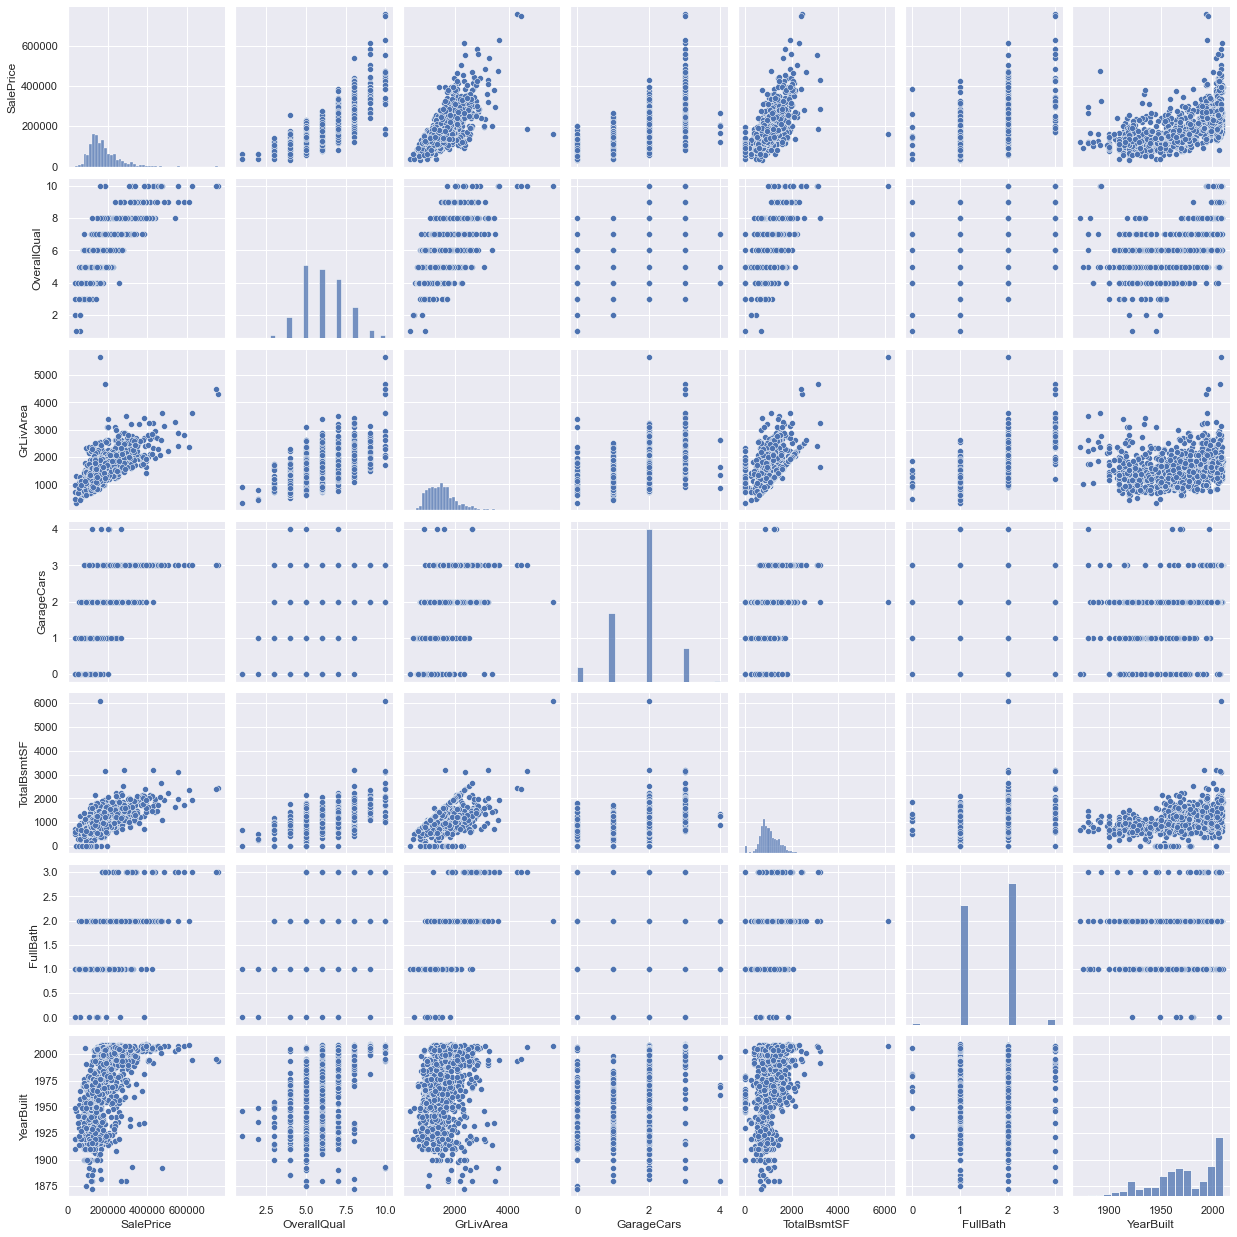

In [48]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols], size = 2.5)
plt.show();

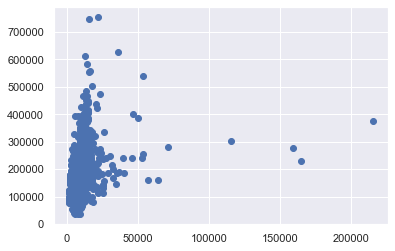

In [49]:
plt.scatter(df['LotArea'],df['SalePrice'])#LotArea values have an influence on the SalePrice.

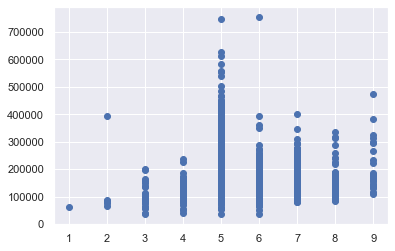

In [50]:
plt.scatter(df['OverallCond'],df['SalePrice'])

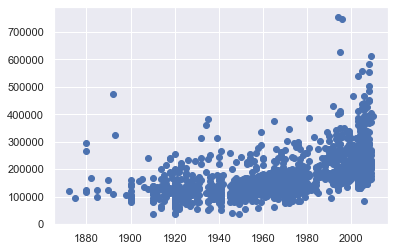

In [51]:
plt.scatter(df['YearBuilt'],df['SalePrice'])#There is a linear increase on SalePrice when the YearBuilt feature is increased.

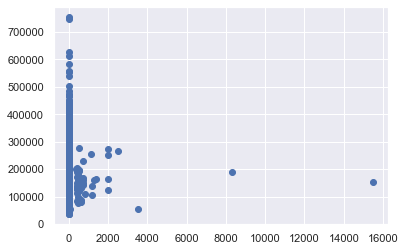

In [52]:
plt.scatter(df['MiscVal'],df['SalePrice'])#There is almost no reliationship between this  two features.

# $Model$

In [53]:
variables = ['LotArea','YearBuilt', 'OverallQual', 'GrLivArea', 'TotalBsmtSF']
x= df[variables]
### ('GarageCars', 'FullBath') unsuccesfull data

In [54]:
y = df['SalePrice']

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.7)#Let's choose our test size 0.2. 

In [56]:
lnr = LinearRegression()

In [57]:
lnr_fit = lnr.fit(x_train,y_train)

In [58]:
lnr.score(x_train,y_train)

0.8158466714529352

In [59]:
lnr.score(x_test,y_test)

0.7206112250596366

In [60]:
lnr.predict(x_test)

array([210912.99799087, 227256.26570215, 158399.19224673, ...,
       109977.19806258, 107035.87440613, 130410.76484433])

# $Predictions$

In [61]:
dt = pd.read_csv('test.csv')
dt.head()#Testing that our data was here or not 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [62]:
variables = ['LotArea','YearBuilt', 'OverallQual', 'GrLivArea', 'TotalBsmtSF']
x_real_predict = dt[variables]
### , 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath'


In [63]:
x_real_predict.fillna(value = "0")
x_real_predict.dropna()
x_real_predict.interpolate(method="linear")
x_real_predict.notnull()


,LotArea,YearBuilt,OverallQual,GrLivArea,TotalBsmtSF
0,True,True,True,True,True
1,True,True,True,True,True
2,True,True,True,True,True
3,True,True,True,True,True
4,True,True,True,True,True
...,...,...,...,...,...
1454,True,True,True,True,True
1455,True,True,True,True,True
1456,True,True,True,True,True
1457,True,True,True,True,True


In [64]:
x_real_predict_1=x_real_predict.head(20)

In [65]:
Model1_Predictions = lnr.predict(x_real_predict_1) 
Model1_Predictions

array([110357.42991303, 180642.15039186, 171068.81082076, 189186.15291192,
       224368.47755946, 183139.28410981, 171344.30330132, 173192.07399643,
       209883.75962097,  88157.32256674, 214488.16823387, 115997.06277726,
       102321.4097025 , 163840.82446009, 146869.51616767, 336775.76373489,
       263931.7204052 , 300363.13112727, 293456.22143755, 416235.68274165])

In [66]:
a_file = open("test.txt", "w") #We record the data set in our text. 
for row in [Model1_Predictions]:
    np.savetxt(a_file, row)

a_file.close()

In [67]:
Model1_Predict = np.loadtxt("test.txt").reshape(20, 1)#After recording the data set , we reshaped our data set for our purpose. 
                                           #x=rows,y=columns
print(Model1_Predict)

[[110357.42991303]
 [180642.15039186]
 [171068.81082076]
 [189186.15291192]
 [224368.47755946]
 [183139.28410981]
 [171344.30330132]
 [173192.07399643]
 [209883.75962097]
 [ 88157.32256674]
 [214488.16823387]
 [115997.06277726]
 [102321.4097025 ]
 [163840.82446009]
 [146869.51616767]
 [336775.76373489]
 [263931.7204052 ]
 [300363.13112727]
 [293456.22143755]
 [416235.68274165]]


In [68]:
from tkinter import *
from tkinter import messagebox
from tkinter import filedialog
from tkinter.ttk import Combobox
from tkinter import messagebox
from tkinter import Canvas
from tkinter import ttk

In [69]:
import pandas as pd

In [70]:
house_prediction = Tk()
house_prediction.title("House Prediction Model")
house_prediction.configure(background='#FF7F50')
house_prediction.geometry("1700x900")
house_prediction.state("normal")


''

In [71]:
def message():
    messagebox.showinfo(title="Successfuly", message="Selection Successful")

def warning():
    messagebox.showwarning(title="Warning", message="Selection Unsuccessful")

In [72]:
def Lot_Area():
    global alan
    Lot_Area_X = int(alan.get())
    if(Lot_Area_X > 0):
        alan = int(Lot_Area_X)
        print(alan)
        message()
    else:
        warning()
        

In [73]:
def Year_Built():
    global year
    Year_Built_X = int(year.get())
    if(Year_Built_X > 0):
        year = int(Year_Built_X)
        print(year)
        message()
    else:
        warning()

In [74]:
def Overall_Qual():
    global qual
    Overall_Qual_X = int(qual.get())
    if(Overall_Qual_X > 0):
        qual = int(Overall_Qual_X)
        print(qual)
        message()
    else:
        warning()

In [75]:
def GrLiv_Area():
    global yesil_alan
    GrLiv_Area_X = int(yesil_alan.get())
    if(GrLiv_Area_X > 0):
        yesil_alan = int(GrLiv_Area_X)
        print(yesil_alan)
        message()
    else:
        warning()

In [76]:
def Total_BsmtSF():
    global bodrum_alani
    Total_BsmtSF_X = int(bodrum_alani.get())
    if(Total_BsmtSF_X > 0):
        bodrum_alani = int(Total_BsmtSF_X)
        print(bodrum_alani)
        message()
    else:
        warning()

In [77]:
#LotArea
alan_label = Label(text = "Enter LotArea", font="helvetica 12",borderwidth=6)
alan_label.place(x = 200, y = 200)

alan = Entry()
alan.place(x = 200, y = 300)

alan_buton = Button(house_prediction, text = "Seç", command = Lot_Area, font="helvetica 12",borderwidth=6)
alan_buton.place(x = 200, y = 400)

In [78]:
#YearBuilt
yil_label = Label(text = "Enter Year Built", font="helvetica 12",borderwidth=6)
yil_label.place(x = 400, y = 200)

year = Entry()
year.place(x = 400, y = 300)

yil_buton = Button(house_prediction, text = "Seç", command = Year_Built, font="helvetica 12",borderwidth=6)
yil_buton.place(x = 400, y = 400)

In [79]:
#Overall_Qual
kalite_label = Label(text = "Enter OverallQual", font="helvetica 12",borderwidth=6)
kalite_label.place(x = 600, y = 200)

qual = Entry()
qual.place(x = 600, y = 300)

kalite_buton = Button(house_prediction, text = "Seç", command = Overall_Qual, font="helvetica 12",borderwidth=6)
kalite_buton.place(x = 600, y = 400)

In [80]:
#GrLiv_Area
yesil_alan_label = Label(text = "Enter GrLiv Area", font="helvetica 12",borderwidth=6)
yesil_alan_label.place(x = 800, y = 200)

yesil_alan = Entry()
yesil_alan.place(x = 800, y = 300)

yesil_alan_buton = Button(house_prediction, text = "Seç", command = GrLiv_Area, font="helvetica 12",borderwidth=6)
yesil_alan_buton.place(x = 800, y = 400)

In [81]:
#Total_BsmtSF
bodrum_alani_label = Label(text = "Enter TotalBsmtSF", font="helvetica 12",borderwidth=6)
bodrum_alani_label.place(x = 1000, y = 200)

bodrum_alani = Entry()
bodrum_alani.place(x = 1000, y = 300)

bodrum_alani_buton = Button(house_prediction, text = "Seç", command = Total_BsmtSF, font="helvetica 12",borderwidth=6)
bodrum_alani_buton.place(x = 1000, y = 400)

In [82]:
def hesapla():
    xxx = [[alan],[year],[qual],[yesil_alan],[bodrum_alani]]  
    xxx = pd.DataFrame(xxx).T
    df_2 = xxx.rename(columns = {0:"LotArea",
                        1:"YearBuilt",
                        2:"OverallQual",
                        3:"GrLivArea",
                        4:"TotalBsmtSF",
                        })
    
    pred = lnr_fit.predict(df_2)
    
    if(pred < 0):
        pred = -1*pred
    pred= int(pred)
    
    #The weights that i found
    Prediction = 1.37054268*alan+380.253037*year+20127.7382*qual+66.0810323*yesil_alan+40.6510696*bodrum_alani-847955.2546399228
    
    s5 = Label(house_prediction, text = "With Using Weigts And Values:", font="helvetica 10",borderwidth=6)
    s5.place(x = 400, y = 470)
    s2 = Label(house_prediction, text = Prediction, font="helvetica 10",borderwidth=6, padx = 200, pady = 40)
    s2.place(x = 400, y = 500)
    s4 = Label(house_prediction, text = "My Training Prediction:", font="helvetica 10",borderwidth=6)
    s4.place(x = 1000, y = 470)
    s3 = Label(house_prediction, text = pred, font="helvetica 10",borderwidth=6, padx = 200, pady = 40)
    s3.place(x = 1000, y = 500)

In [83]:
hesapla_buton = Button(house_prediction, text = "CALCULATE", command = hesapla, font="helvetica 15",borderwidth=10, padx = 10, pady = 10, background = "#f7fafc")
hesapla_buton.place(x = 1200, y = 300)

s1 = Label(house_prediction, text= "", font="helvetica 12",borderwidth=10, padx = 50, pady = 20)
s1.place(x = 1210, y = 700)   

In [84]:
house_prediction.mainloop()

8450
2003
7
1710
856


In [85]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
